# Estimation Theory

### Prof. Dr.Juanjo Manjarín
**Statistics & Data Analysis**


---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as ss
import statsmodels.stats.weightstats as smw
import statsmodels.stats.proportion as smp

plt.style.use("seaborn")

## The Central Limit Theorem

This is a main result in statistics and states that 

<br>

*"For a set of $n$ independent random variables with arbitrary probability distribution with mean $E[X]$ and standard deviation $SD[X]$, their sum*

\begin{equation}
X = \sum_i^n \xi_i
\end{equation}

*has, in the limit $n\to\infty$, a cumulative distribution from*

\begin{equation}
\frac{X-E[X]}{SD[X]}
\end{equation}

*which approaches the standard normal distribution."*

<br>

Let's define the following function to illustrate this main result in Python

In [2]:
def clt(m, scale, n, x):
  '''
  This function uses the Exponential Distribution with scale = 1/lambda to ilustrate 
  the Central Limit Theorem. This can be changed at your own will, but then be careful
  with the arguments of the function. The function computes the distribution of means or 
  of variances of a set of 500 random samples

  Inputs:
  m: loc of the exponential
  scale: scale of the exponential
  n: number of observations for the random generator
  x: measure to be used, can be 'mean' or 'var'

  Output:
  np.array with 500 values of the measure used in each sample 
  '''
  dist = ss.expon(m, scale)

  return np.array({'mean': [dist.rvs(size= n).mean() for i in range(0,500,1)],
                   'var': [dist.rvs(size= n).var() for i in range(0,500,1)]
                   }.get(x,'Measures must be: "mean" or "var"'))

Let's use it to see the evolution of a distribution of means with icreasing values of $n$. In particular let's take values from $2$ to $1000$ (change these values at your own will to see other possibilities).

Since the mean is precisely a sum of $n$ random variables, this theorem should apply (the same is true for any other moment: variance, skewness and so on), then again, change this measure to see how other options behave

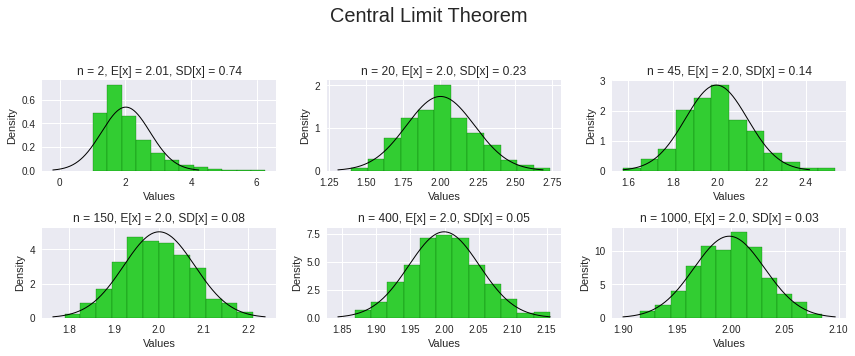

In [3]:
nSet = [2 ,20 ,45 ,150 ,400 ,1000]
coords = [(0,0), (0,1), (0,2), (1,0), (1,1), (1,2)]

plt.figure(figsize = (12,5))

for i,j in zip(nSet, coords):
  mean = clt(1, 1, i, 'mean').mean()
  sd = clt(1, 1, i, 'mean').std()
  x = np.arange(mean - 3*sd, mean + 3*sd, 0.001)

  plt.suptitle("Central Limit Theorem", fontsize = 20)

  plt.subplot2grid((2,3),(j[0], j[1]))
  plt.hist(clt(1, 1, i, 'mean'), bins = 12, ec = "darkgreen", color = "limegreen", density = True) 
  plt.title("n = " + str(i) + ", E[x] = " + str(np.round(mean, 2)) + ", SD[x] = " + str(np.round(sd, 2)))
  plt.ylabel("Density")
  plt.xlabel("Values")

  plt.plot(x, ss.norm.pdf(x, mean, sd), color = "black", lw = 1)

plt.tight_layout(rect = (0, 0, 1, 0.93))
plt.show()

Now, if you see there is a **main assumption** in this theorem:the random variables must have a **mean** and a **variance** (standard deviation). This seems to be the case in many situations, but there are some real life cases in which this assumption does not hold, for example, in **finance**, the distribution of differences in the closing prices of stocks usually have to be described by **Cauchy-Lorentz** distributions. The main problem in this case is that there are too many outliers and their contribution can be too much to let the integral of the mean converge to a finite value (this is true also for the variance and any other higher moment).

If there is no mean and no standard deviation, the central limit simply does not hold. Let's see it using the Cauchy distribution

In [4]:
def clt_cauchy(m, scale, n, x):
  dist = ss.cauchy(m, scale)

  return np.array({'mean': [dist.rvs(size= n).mean() for i in range(0,500,1)],
                   'var': [dist.rvs(size= n).var() for i in range(0,500,1)]
                   }.get(x,'Measures must be: "mean" or "var"'))

then using a set of larger values for $n$ than the previous ones

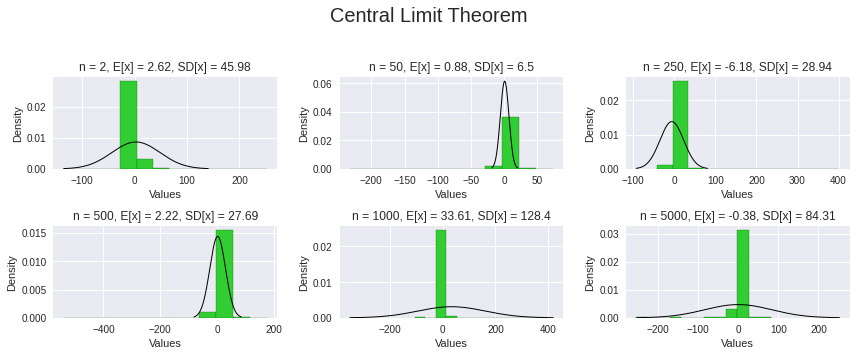

In [5]:
nSet = [2 ,50 ,250 ,500 ,1000 ,5000]
coords = [(0,0), (0,1), (0,2), (1,0), (1,1), (1,2)]

plt.figure(figsize = (12,5))

for i,j in zip(nSet, coords):
  mean = clt_cauchy(1, 1, i, 'mean').mean()
  sd = clt_cauchy(1, 1, i, 'mean').std()
  x = np.arange(mean - 3*sd, mean + 3*sd, 0.001)

  plt.suptitle("Central Limit Theorem", fontsize = 20)

  plt.subplot2grid((2,3),(j[0], j[1]))
  plt.hist(clt_cauchy(1, 1, i, 'mean'), bins = 12, ec = "darkgreen", color = "limegreen", density = True) 
  plt.title("n = " + str(i) + ", E[x] = " + str(np.round(mean, 2)) + ", SD[x] = " + str(np.round(sd, 2)))
  plt.ylabel("Density")
  plt.xlabel("Values")

  plt.plot(x, ss.norm.pdf(x, mean, sd), color = "black", lw = 1)

plt.tight_layout(rect = (0, 0, 1, 0.94))
plt.show()

see that it does not really matter how big we choose the value of $n$: the distribution of means does not converge into the normal distribution.

In this course we will restrict ourselves to those cases in which the central limit theorem holds and then we can use the results in the next sections for inference.

## Sampling Distribution of Sampling Statistics

A sampling distribution of sampling statistics is the probability distribution that results from finding the given statistic in all the possible samples of fixed size from a population.

In particular we are going to see:

 * The **sampling distribution of sampling means** where the statistic computed is the mean
 * The **sampling distribution of sampling variances** where the statistic computed is the variance
 * The **sampling distribution of sampling proportions** where the statistic computed is the proportion

### Sampling Distribution of Sampling Means

As said before, we take all the possible samples of fixed size from a population and find all their means, then the expected values and variance of this distribution of means must exist if we want to use the central limit theorem.

Now, in estimation we *define* he estimator as rule where:

 * We **assign** the value of the statistic we compute to the value of the population
 * This assignment is completely independent of the population size (so this is true even for size $n=1$), i.e.
 \begin{equation}
 E[x]=\mu
 \end{equation}

for any observation $x$

Remember that we know that this is not necessarily *true* and we will have to deal with the associated problems through the estimation of the **standard error**, i.e. the standard deviation of the estimator.

Then for samples of arbitrary size $n$ we can find the distribution of all the possible means and now find the expected value of this distribution

\begin{equation}
\begin{array}{rcl}
E[\bar x] & = & \displaystyle E\left[\frac{1}{n}\sum_i^n x_i\right]\\[2ex]
& = & \displaystyle\frac{1}{n}E\left[\sum_i^n x_i\right] \\[2ex]
& = & \displaystyle\frac{1}{n}\sum_i^n E[x_i]\\[2ex]
& = & \displaystyle\frac{n\mu}{n}\\[2ex]
& = & \mu
\end{array}
\end{equation}

therefore the **expected value** of the **sampling distribution of sampling means** exists and is equal to the **population mean**.

This property is what allow us to declare the sample mean as the **point estimator** of the population mean.

This computation can be repeated for the variance in order to find

\begin{equation}
V[\bar x] = \frac{\sigma^2}{n}
\end{equation}

from where we can find that the **standard error** is

\begin{equation}
SD[\bar x]=\frac{\sigma}{\sqrt{n}}
\end{equation}

we see that the dependence of the standard error with $n$ is such that in the limit $n\to\infty$, it goes to 0, i.e. it is a consistent estimator and less efficient at smaller sample sizes that at higher ones. In fact, the sample mean is the more efficient unbiased estimator we can find for the population mean

### Sampling Distribution of Sampling Variances

We mmay repeat the procedures before but using the variance as the estimator. However, if we use the common definition of variance

\begin{equation}
s_x^2=\frac{1}{n}\sum_i^n (x_i-\bar x)^2
\end{equation}

we find that it is a biased estimator, since its expected value is not equal to the population variance but

\begin{equation}
E[s_x^2] = \frac{n-1}{n}\sigma^2
\end{equation}

The conclusion is that we need to use another estimator for the population variance: the **quasi-variance**

\begin{equation}
\tilde s_x^2 = \frac{1}{n-1}\sum_i^n (x_i-\bar x)^2 = \frac{n}{n-1}s_x^2
\end{equation}

with this small change we obtain that

\begin{equation}
E[\tilde s_x^2] = \sigma^2
\end{equation}

note that from now on we will drop the tilde on top of the quasi-variance (as well as the *quasi*) and it should always be understood that the sample variance is always the quasi-variance.

From this definition we can also find that

\begin{equation}
V[\tilde s_x^2]=\frac{1}{n-1}\sigma^4
\end{equation}

although we will not use this standard error in our computations. Instead we typically use the $\chi^2$-distribution

#### The $\chi^2$ distribution

we define the distribution as the sum of squares of standard normal distributions. Then using the proper definitions we can easily find that

\begin{equation}
\begin{array}{rcl}
\chi^2_{n-1} & = & \displaystyle\sum_iZ_i^2\\[2ex]
& = & \displaystyle (n-1)\frac{s_x^2}{\sigma^2}
\end{array}
\end{equation}

therefore we can use this distribution to establish a relation between the population variance and the sample variance. We use the subindex $n-1$ as a reference to the **degrees of freedom** of the distribution

Let's see how this distribution changes with respect to these degrees

In [6]:
from scipy.stats import chi2

then, let's generate a set of distributions differing only in the sample size $n$, i.e. we take the standarized form and modify only the degrees of freedom.

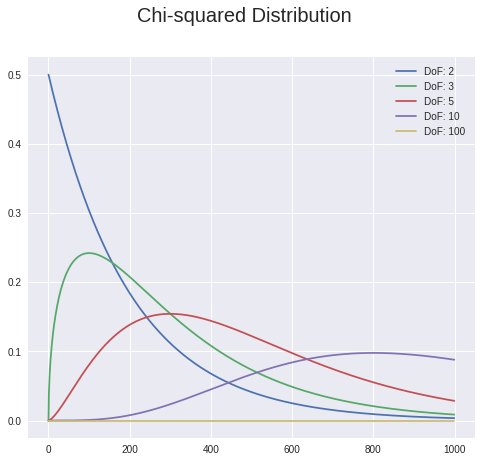

In [7]:
x = np.arange(0, 10, 0.01)
nSet = [2, 3, 5, 10, 100]

plt.figure(figsize = (8,7))
plt.suptitle("Chi-squared Distribution", fontsize = 20)

for i in nSet:
  plt.plot(chi2.pdf(x, i), label = 'DoF: ' + str(i))
  plt.legend(loc = "best")

plt.show()

maybe the most important property of this distribution is that it is not symmetric and then we have to be careful once we compute the percentiles and the cumulative probabilities

### Sampling Distribution of Sampling Proportions

The last case we are going to see is when we have a categorical variable (can be numerical but is less common) and we study the proportions. We take the sample proportion as

\begin{equation}
p_i = \frac{n_i}{n}
\end{equation}

then we want to find the expected value of a distribution of these proportions. We can write this as

\begin{equation}
P = \frac{X}{n}
\end{equation}

where $X$ is a binomial random variable. Then, if we can use the normal approximation we can write

\begin{equation}
E[p] = P,\quad V[p] = \frac{P(1-P)}{n}
\end{equation}

which allow us to write a standard normal distribution from the z-score

\begin{equation}
Z = \frac{p-P}{\sqrt{\frac{P(1-P)}{n}}}
\end{equation}

## Confidence Intervals

We know that the efficiency of an estimator is given in terms of its standard error, then we are going to incorporate this information to the point estimator. The result of this are going to be the **confidence intervals*. In general (for symmetric distributions) we can say that

<br>

\begin{equation}
\text{Confidence Interval} = \text{Point Estimator} \pm \text{Margin of Error}
\end{equation}

<br>

where the **margin of error** is the part that contains information about both, the probability distributioin of the population parameter and of the standard error of the estimator.

### Confidence Interval of the Mean of a Population with Known Variance

We have already seen that making use of the sampling distribution of sample means, we can say three main ideas:

 * that the **point estimator** of the population mean is the sample mean
 * that the **standard error** is given by the population variance divided by the sample size
 * that the distribution can be approximated by a **normal distribution**

With this in mind we can write the Z-score of this distribution as

<br>

\begin{equation}
Z = \frac{\bar x-E[\bar x]}{SD[\bar x]}=\frac{\bar x-\mu}{\sigma/\sqrt{n}}
\end{equation}

</br>

With this Z-score let's find the probability

<br>

\begin{equation}
P(-z_{\alpha/2}<Z<z_{\alpha/2}) = 1-\alpha
\end{equation}

</br>

as seen in the graph below

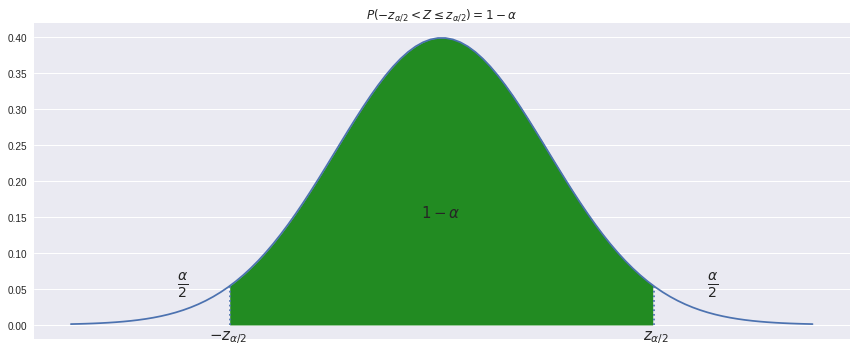

In [8]:
v1 = -2
v2 = 2
mu  = 0
s   = 1
minX = mu - 3.5*s
maxX = mu + 3.5*s

x = np.linspace(minX, maxX, 100)
px1 = x[x<v1]
px2 = x[x<v2]
x3 = np.arange(v1,v2, 0.01)

y = ss.norm.pdf(x=x, loc=mu, scale=s)

plt.figure(figsize=(12,5))

plt.plot(x,y)
plt.fill_between(x=x3, y1=0, y2=ss.norm.pdf(x3,mu,s), color = "forestgreen")
plt.vlines(x=v2, ymin=0, ymax=ss.norm.pdf(v2,mu,s), linestyle='dotted')
plt.vlines(x=v1, ymin=0, ymax=ss.norm.pdf(v1,mu,s), linestyle='dotted')
plt.title(r'$P(-z_{\alpha/2}<Z\leq z_{\alpha/2}) = 1-\alpha$')
plt.xticks([], [])

plt.text(-0.2,0.15,r'$1-\alpha$', fontsize = 15)
plt.text(-2.5,0.05,r'$\frac{\alpha}{2}$', fontsize = 20)
plt.text(2.5,0.05,r'$\frac{\alpha}{2}$', fontsize = 20)
plt.text(-2.2,-0.02,r'$-z_{\alpha/2}$', fontsize = 15)
plt.text(1.9,-0.02,r'$z_{\alpha/2}$', fontsize = 15)

plt.tight_layout()
plt.show()

see that $z_{\alpha/2}$ represents the percentile such that its survival probability is $\alpha/2$, and $-z_{\alpha/2}$ the percentile such that its cumulative probability is $\alpha/2$. 

Using as Z the Z-score we just defined above it is easy to see that this probability can be written as

<br>

\begin{equation}
P\left(\bar x - z_{\alpha/2}\frac{\sigma}{\sqrt{n}} < \mu \leq \bar x + z_{\alpha/2}\frac{\sigma}{\sqrt{n}}\right)=1-\alpha
\end{equation}

</br>

It is from this equality from where we read the **confidence interval**, that can be written as

\begin{equation}
\mu\in\bar x \pm z_{\alpha/2}\frac{\sigma}{\sqrt{n}}
\end{equation}

for a $(1-\alpha)\%$ of confidence level.

#### Confidence Intervals in Python

The most straightforward way of finding the CI is to apply directly the formula, then suppose the following dataset for the sample of the `age` of a population

In [9]:
age = np.array([18, 23, 19, 18.4, 17.8, 21, 17.9, 18, 18.2, 18.7, 18.3, 19.2, 19.1, 20.1])

Let's assume that we know:

 * The population variance is 2
 * We want to find the 95% CI for the population mean

Then

In [10]:
sample_mean = age.mean()
pop_var = 2
n = len(age)
CL = 0.95
SL = 1 - CL

Now we find the **margin of error** as

In [11]:
ME = ss.norm.ppf(1-SL/2)*np.sqrt(pop_var/n)

and then the CI is given by

In [12]:
lower = sample_mean - ME
upper = sample_mean + ME

print("The {:3.2%} Confidence Interval for the Population Mean is [{:4.3f}, {:4.3f}]".format(CL, lower, upper))

The 95.00% Confidence Interval for the Population Mean is [18.309, 19.791]


We may also use `statsmodels` package but now be careful because in this case we have to take some steps before we obtain the result. Note that in this case we need to create **always** the object in statsmodels for the `DescrStatsW()` method, then

In [13]:
des = smw.DescrStatsW(age)

this object contains the information we can call now using other functions of `statsmodels`, in this case the function`zconfint_mean` which returns the confidence interval for a normal population of known variance

In [14]:
low_ss, upp_ss = des.zconfint_mean(SL)
print("The {:3.2%} Confidence Interval for the Population Mean using StatsModels is [{:4.3f}, {:4.3f}]".format(CL, low_ss, upp_ss))

The 95.00% Confidence Interval for the Population Mean using StatsModels is [18.289, 19.811]


Why do they not coincide? Because statsmodels is not asking for a population variance! Be careful with this crucial point.

#### Changing Parameters

We can see that the width (error) of the CI we have just found depends on some parameters

 * The percentile of the normal distribution
 * The sample size
 * The population variance

The last one is something we simply cannot change, since it is a population value. However the other two can and should be chosen with care.

 * If we simply increase the CL without any other change, we would simply enlarge the amount of possible values in the CI so if we choose 100% CI that means that we allow for all the values...we are definitely more confindent, but that does not give any useful information. Note that increasing the CL implies increasing the ME. In the context of hypothesis testing we will see how to choose the CL.
 * If we increase the sampe size we may reduce the error, since it is in the denominator, but be careful since the sample size must be decided *before* we make this computation.

### Interpretation of a C.I.

To understand the actual meaning of a confidence interval, let's consider the following example:

 * We have a **population** of 16 people of known age. In this case we can find the mean population age directly
 * We will take **100 random samples**, normally distributed, with mean the known population and standard deviation the known population standard deviation
 * We will compute the confidence intervals for these 100 samples and plot them comparing them with the population mean

Our **population** is the following

In [15]:
age = np.array([18.5, 17.6, 21.1, 17.1, 49.0, 25, 18.2, 17.9, 18.1, 18.0, 18.9, 17.4, 25.4, 17.4, 19.5, 17.3])

from where we can find the values

In [16]:
m = age.mean()
sd = age.std()
n = len(age)

print("The population has \n\nMEAN: {:<6.3f}\nSTANDARD DEVIATION: {:<6.3f}\nSIZE: {:<6.0f}".format(m, sd, n))

The population has 

MEAN: 21.025
STANDARD DEVIATION: 7.638 
SIZE: 16    


Now we can define the function that will compute the confidence intervals. We do it with a default **significance level** of 0.05 which is equivalent to a confidence interval of 95%

In [17]:
def c_int(x, alpha = 0.05):
  des = smw.DescrStatsW(x)
  df = pd.DataFrame(np.array(des.zconfint_mean(alpha=alpha)),
                    index = ['lower', 'upper'])
  return(df)

Finally we gerate a dataframe with the **100 random samples** taken from a normal population of known mean and variance (the ones found before)

In [18]:
nran = 100

df = pd.DataFrame([[np.random.normal(m, sd) for i in range(nran)] for j in range(n)])
df.iloc[:, 0:8].head()

,0,1,2,3,4,5,6,7
0,14.077299,6.473092,23.953185,16.870187,29.268928,14.089693,12.454461,27.540222
1,19.642931,17.930934,28.153068,35.562665,21.727270,18.882847,13.530529,12.809864
2,32.328874,22.423784,25.451831,9.541446,21.799230,27.823055,8.688776,7.720500
3,20.494215,29.899173,27.445185,24.641368,28.775611,25.375303,28.709359,27.652346
4,17.160466,19.875723,20.467998,36.542461,31.871691,30.376511,21.078803,13.235413


The next chunk returns a dataframe with **100 confidence intervals** for the previous samples: one per column

In [19]:
cint_df = pd.DataFrame(index = ['lower', 'upper'])
for i in range(100):
  cint_df[i] = c_int(df[i])
cint_df.iloc[:, 0:8].head()

,0,1,2,3,4,5,6,7
lower,19.113585,13.910892,21.987772,15.511207,18.603887,17.129098,15.495714,19.659067
upper,25.701668,21.225325,28.472619,25.254727,24.992587,23.724012,21.048493,28.620901


Now we can plot all the confidence intervals, see that we are going to plot them as lines covering the whole range then inthe plot we have:

 * In the horizontal axis, the range covered by the confidence intervals
 * In the vertical axis, the index of the confindence interval, spaced in intervals of 0.5

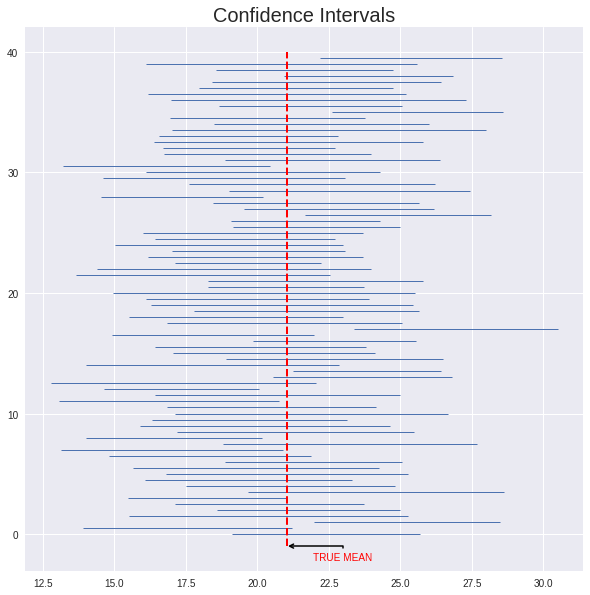

In [20]:
y = np.arange(0, 40, 0.5)
cols = np.arange(0, 99, 1)

plt.figure(figsize = (10,10))

for i,j in zip(y, cols):
  plt.hlines(i, cint_df[j][0], cint_df[j][1], lw = 1)

plt.title("Confidence Intervals", fontsize = 20)

plt.vlines(m, -1, 40, color = "red", linestyles = "dashed", lw = 2)
plt.annotate("TRUE MEAN", xytext = (23, -1.5), xy = (21, -1), 
             ha = "center", 
             va = "top",
             color = "red",
             arrowprops= dict(arrowstyle = "->", 
                              connectionstyle = "angle", 
                              color = "black",
                              lw = 1.5))

plt.show()

If we want to find how many of the confidence intervals do actually contain the population mean we can just do (note that this value should be 95 or close to it once we have taken that as our confidence level)

In [21]:
np.sum((cint_df.iloc[0] <= m) & (cint_df.iloc[1] >= m))

87

### Confidence Interval for the Population Mean of a Population with Unkown Variance

The case we are going to study now can also be understood in the context of **Small Samples**, since now the Central Limit Theorem cannot be applied and we are not allowed to use the normal approximation. 

In this case we introduce a new probability distribution: the **t-Student** distribution.

#### The t-Student distribution

To define thsi distribution we use the $\chi^2$ distribution since it provides and estimation of the population variance, then we write it as

\begin{equation}
t = \frac{Z}{\sqrt{\frac{\chi^2}{n}}} = \frac{\bar x-\mu}{s/\sqrt{n}}
\end{equation}

then see that it is basically a z-score in which we replace the population variance by the sample variance. Let's make a graphical representation of this distribution. For it we import it from the `scipy.stats` package

In [22]:
from scipy.stats import t

now, the only point in this case is that, as with the $\chi^2$ distribution, we have to use the **degrees of freedom** as depending on the sample size

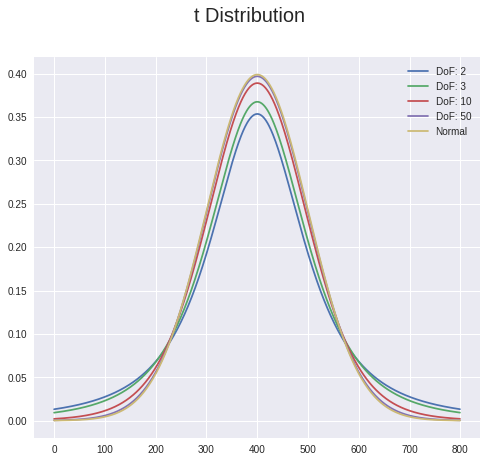

In [23]:
x = np.arange(-4, 4, 0.01)
nSet = [2, 3, 10, 50]

plt.figure(figsize = (8,7))
plt.suptitle("t Distribution", fontsize = 20)

for i in nSet:
  plt.plot(t.pdf(x, i), label = 'DoF: ' + str(i))
plt.plot(ss.norm.pdf(x), label = 'Normal')
plt.legend(loc = "best")

plt.show()

Note that:

 * The t-distribution has heavier tails than a normal distribution and, consequently, is less peaked.
 * It tends to the normal distribution as we increase $n$. In the graph we see that for a sample size of 50 we have more or less the same distribution. This is the minimum sample size we will use to allow for a normal approximation.

With this distribution and following the same steps as before we can write the **Confidence Interval** as

\begin{equation}
\mu\in\bar x \pm t_{n-1,\alpha/2}\frac{s}{\sqrt{n}}
\end{equation}

for a $(1-\alpha)\%$ of confidence level

#### Confidence Interval in Python

Let's now find the confidence interval for the same case as before without assuming that we are given a population variance, then

In [24]:
age = np.array([18, 23, 19, 18.4, 17.8, 21, 17.9, 18, 18.2, 18.7, 18.3, 19.2, 19.1, 20.1])

sample_mean = age.mean()
sample_var = age.var()
n = len(age)
CL = 0.95
SL = 1 - CL

Then we use directly the formula given above as

In [25]:
ME_t = t.ppf(1-SL/2, n-1)*np.sqrt(sample_var/n)

lower_t = sample_mean - ME_t
upper_t = sample_mean + ME_t

print("The {:3.2%} Confidence Interval for the Population Mean is [{:4.3f}, {:4.3f}]".format(CL, lower_t, upper_t))

The 95.00% Confidence Interval for the Population Mean is [18.241, 19.859]


To find this CI using `statsmodels` we do

In [26]:
des = smw.DescrStatsW(age)

low_t, upp_t = des.tconfint_mean(SL)
print("The {:3.2%} StatsModels Confidence Interval for the Population Mean is [{:4.3f}, {:4.3f}]".format(CL, low_t, upp_t))

The 95.00% StatsModels Confidence Interval for the Population Mean is [18.211, 19.889]


### Confidence Interval for a Population Proportion

In case we can use the normal approximation, i.e. if

\begin{equation}
\begin{array}{rcl}
np & > & 10\\[2ex]
nq & > & 10
\end{array}
\end{equation}

we can use the results we found before to write

\begin{equation}
P\in p\pm z_{\alpha/2}\sqrt{\frac{p(1-p)}{n}}
\end{equation}

for a $(1-\alpha)\%$ of CL.

#### Confidence Interval in Python

Just in the previous cases we can use either the formula or the `statsmodels` package. To see it, let's generate a random dataset as follows

 * In the data set `1` will correspond to a `yes` in a questioinnaire and `0` will correspond to a `no`
 * We will find the sample proportion and then the confidence interval

In [27]:
data = np.array(np.random.randint(0,2,400))

let's check if we can use the normal approximation

In [28]:
unique, counts = np.unique(data, return_counts=True)

n = len(data)
p = counts[1]/n

NP = n*p
NQ = n*(1-p)

if NP >= 10:
  if NQ >= 10:
    print("We CAN use the Normal Approximation since np = {:<3.0f} and nq = {:<3.0f}".format(NP,NQ))
  else:
    print("We CANNOT use the Normal Approximation since np = {:<3.0f} and nq = {:<3.2f}".format(NP,NQ))

We CAN use the Normal Approximation since np = 207 and nq = 193


Now we just find the **margin of error** and the **confidence interval**

In [29]:
ME = ss.norm.ppf(1-SL/2)*np.sqrt(p*(1-p)/n)

lower_p = p - ME
upper_p = p + ME

print("The {:3.2%} Confidence Interval for the Population Proportion is [{:4.3f}, {:4.3f}]".format(CL, lower_p, upper_p))

The 95.00% Confidence Interval for the Population Proportion is [0.469, 0.566]


If we want to use the `statsmodels` package we use the `proportion` module

In [30]:
low_sp, upp_sp = smp.proportion_confint(counts[1], n, alpha = SL, method = 'normal')
print("The {:3.2%} Statsmodels Confidence Interval for the Population Proportion is [{:4.3f}, {:4.3f}]".format(CL, low_sp, upp_sp))

The 95.00% Statsmodels Confidence Interval for the Population Proportion is [0.469, 0.566]


which, in this case, coincide with our previous result